In [153]:
import numpy
#copied from the matlab by falsy winchnet.
#Emperical Fourier Decomposition technique

def segm_tec(f, N):
    x = numpy.asarray(f)
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = numpy.where(numpy.isnan(x))[0]
    indl = numpy.asarray(indnan)

    if indl.size != 0:
        x[indnan] = numpy.inf
        dx[numpy.where(numpy.isnan(dx))[0]] = numpy.inf


    vil = numpy.zeros(dx.size + 1)
    vil[:-1] = dx[:]
    vix = numpy.zeros(dx.size + 1)
    vix[1:] = dx[:]

    ind =  numpy.where((numpy.hstack((dx, 0)) <= 0) & (numpy.hstack((0, dx)) > 0))[0]
    if ind.size and indl.size:
        outliers = numpy.unique(numpy.concatenate((indnan, indnan - 1, indnan + 1)))
        booloutliers = isin(ind, outliers)
        booloutliers = numpy.invert(booloutliers)
        ind = ind[booloutliers]
    
    if ind.size < 2:
        return numpy.asarray([0,len(x)])
    locmax = numpy.zeros((x.size),dtype=numpy.float64)
    locmax[ind] = x[ind]
    locmax[0] = 0
    locmax[-1] = 0 #ends cannot be peaks!
    desc_sort_index = numpy.argsort(locmax)[::-1]
    
    for each in range(1,desc_sort_index.size-1):
        if desc_sort_index[each] -1 ==  desc_sort_index[each+1] :
            locmax[desc_sort_index[each]] = 0 #only the rightmost can be a peak
        if desc_sort_index[each] + 1 == desc_sort_index[each+1] :
            locmax[desc_sort_index[each]] = 0 #only the rightmost... a peak

    desc_sort_index = desc_sort_index[locmax[desc_sort_index] > 0.0]

    if N == 1:
        desc_sort_index = desc_sort_index[0]
    else:
    # keep the N-th highest maxima and their index
        if N < desc_sort_index.size:
            desc_sort_index = desc_sort_index[0:N] 
        desc_sort_index = numpy.sort(desc_sort_index)  # gotta sort them again
        
        print(desc_sort_index.size, N)
        N = desc_sort_index.size
    print(N)
    bounds = numpy.zeros((N + 3), dtype=int)
    if N == 1: #if only one peak is desired
        bounds[1] = (numpy.argmin(x[0:desc_sort_index]))
        bounds[2] = (desc_sort_index + numpy.argmin(x[desc_sort_index:x.size]) - 1)
    else:
        bounds[1] = (numpy.argmin(x[0:desc_sort_index[0]]))  

        for i in range(N - 1):
            bounds[i + 2] = (desc_sort_index[i] + numpy.argmin(x[desc_sort_index[i]:desc_sort_index[i + 1]]) - 1)
        bounds[-2] = (desc_sort_index[-1] + numpy.argmin(x[desc_sort_index[-1]:x.size]) - 1)
    bounds[-1] = x.size
    cerf = desc_sort_index * numpy.pi / round(len(f))
    
    return numpy.asarray(bounds), cerf


def EFD(data: numpy.ndarray, N: int):
    if N < 1:
        return x

    # we will now implement the Empirical Fourier Decomposition
    x = numpy.asarray(data, dtype=numpy.float64)
    ff = numpy.fft.rfft(x)
    # extract the boundaries of Fourier segments
    bounds, cerf = segm_tec(numpy.absolute(ff[0:round(ff.size / 2)]), N)
    if bounds.size < 3:
        return x #no need to go further because we have nothing to work with
    # truncate the boundaries to [0,pi]
    bounds = bounds * numpy.pi / round(len(ff) / 2)

    # extend the signal by miroring to deal with the boundaries
    l = round(len(x) / 2)
    z = numpy.lib.pad(x, ((round(len(x) / 2)), round(len(x) / 2)), 'symmetric')
    ff = numpy.fft.rfft(z)

  
    # obtain the boundaries in the extend f
    bound2 = numpy.ceil(bounds * round(len(ff) / 2) / numpy.pi).astype(dtype=numpy.int64)
    efd = numpy.zeros(((len(bound2) - 1, len(x))), dtype=numpy.float64)
    ft = numpy.zeros((efd.shape[0], len(ff)), dtype=numpy.cdouble)
    # define an ideal functions and extract components
    for k in range(efd.shape[0]):
        if bound2[k] == 0:
            ft[k, 0:bound2[k + 1]] = ff[0:bound2[k + 1]]
            # ft[k,len(ff)+1-bound2[k+1]:len(ff)] = ff[len(ff)+1-bound2[k+1]:len(ff)]
            ft[k, -bound2[k + 1]:len(ff)] = ff[-bound2[k + 1]:len(ff)]

        else:
            ft[k, bound2[k]:bound2[k + 1]] = ff[bound2[k]:bound2[k + 1]]
            # ft[k,len(ff)+1-bound2[k+1]:len(ff)+1-bound2[k]] = ff[len(ff)+1-bound2[k+1]:len(ff)+1-bound2[k]]
            ft[k, -bound2[k + 1]:-bound2[k]] = ff[-bound2[k + 1]:-bound2[k]]
        rx = numpy.fft.irfft(ft[k, :])
        efd[k, :] = rx[l:-l].real

    return efd.astype(dtype=data.dtype), cerf, bounds

[0 0 0 0 3 3]
3 3
3


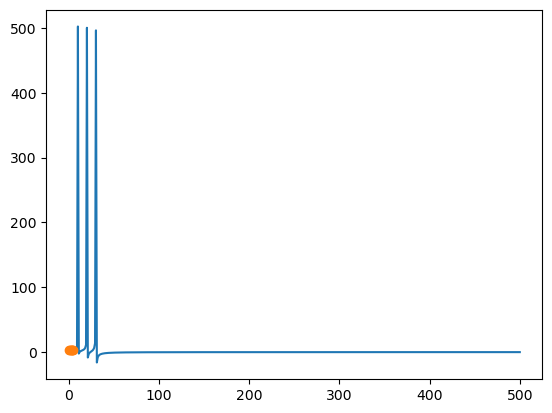

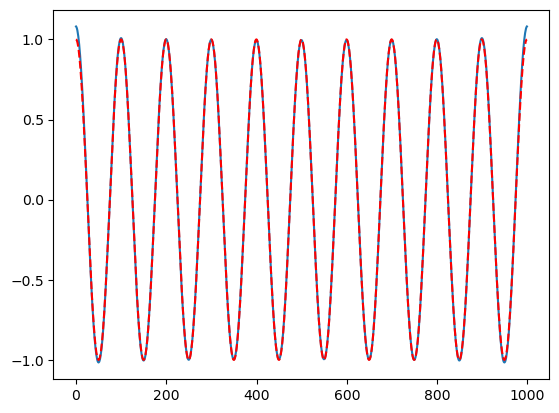

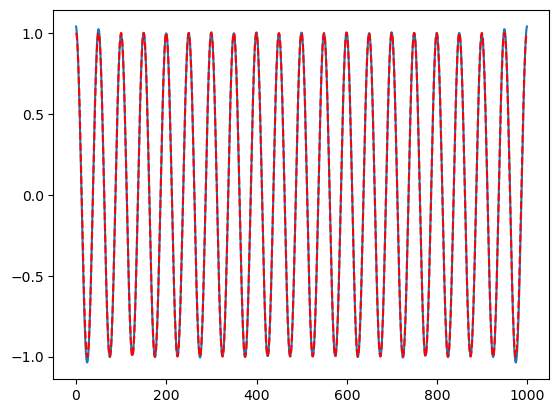

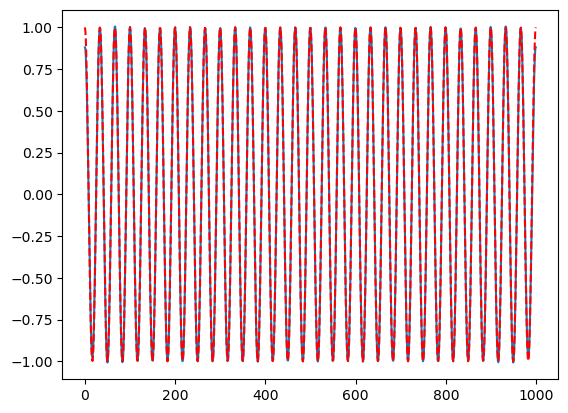

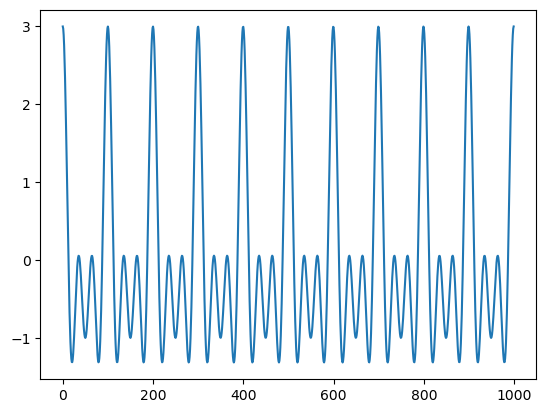

In [155]:
import matplotlib.pyplot as plt

t = numpy.linspace(0,1,1000, dtype=numpy.float64)
x_1 = numpy.cos(2*numpy.pi*10*t)
x_2 = numpy.cos(2*numpy.pi*20*t)
x_3 = numpy.cos(2*numpy.pi*30*t)
xx = numpy.vstack((x_1,x_2,x_3))

y = x_1 + x_2 + x_3
print(bounds.astype(dtype=int))
efd,bounds = EFD(y,3)
q = numpy.fft.rfft(y)
plt.plot(q)
plt.plot(q[bounds.astype(dtype=int)], "o")
plt.show()

plt.plot(efd[1])
plt.plot(x_1,'r--')
plt.show()
plt.plot(efd[2])
plt.plot(x_2,'r--')
plt.show()
plt.plot(efd[3])
plt.plot(x_3,'r--')
plt.show()

plt.plot(y)